In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [31]:
processed_data_folder = '../processed_data_'
data_tesla = os.path.join(processed_data_folder, 'tesla_results.parquet')

df_tesla = pd.read_parquet(data_tesla)

df_tesla

,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
Date,,,,,,,,,,
2023-05-01,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
2015-02-01,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2019-01-01,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
2021-02-01,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
2016-12-01,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722
...,...,...,...,...,...,...,...,...,...,...
2021-10-01,Middle East,Model Y,13488,14333,113771.10,120,719,1454.68,Official (Quarter),4273
2019-07-01,Middle East,Model S,18300,18407,81889.67,82,487,1336.81,Official (Quarter),9833
2019-09-01,Asia,Model S,13291,14839,97139.38,100,580,1156.32,Estimated (Region),13709


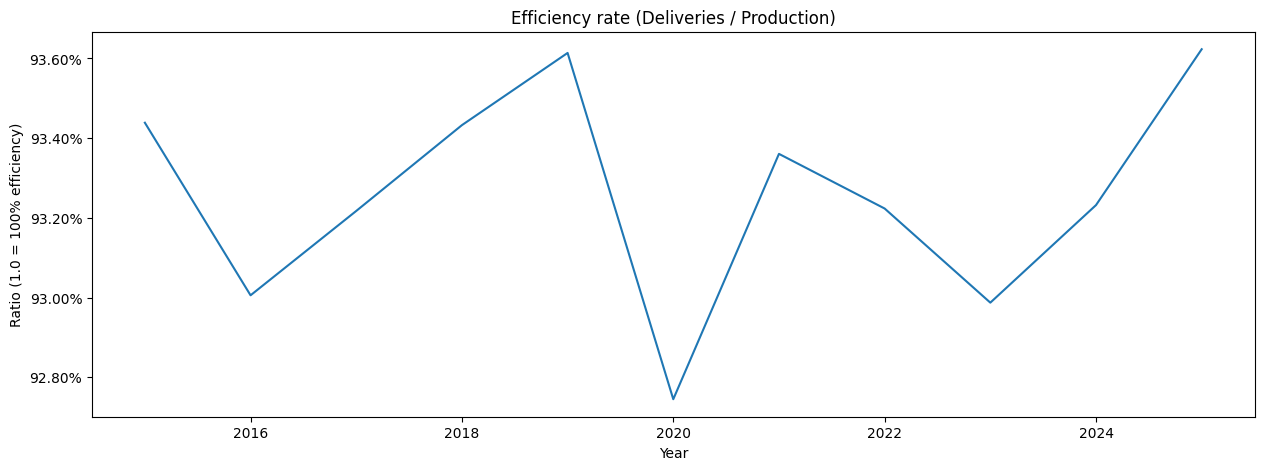

In [37]:
df_tesla['Year'] = df_tesla.index.year

df_tesla['Efficiency_ratio'] = df_tesla['Estimated_Deliveries'] / df_tesla['Production_Units']

plt.figure(figsize=(15,5))
ax = sns.lineplot(
    data=df_tesla,
    x='Year',
    y='Efficiency_ratio',
    errorbar=None
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.ylabel('Ratio (1.0 = 100% efficiency)')
plt.title('Efficiency rate (Deliveries / Production)')
plt.show()